In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aryamulahernawan","key":"d7ceb4e166f0f4c2713b1b2b957b3f4b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d yusufekam/sna-naturalisasitimnas
!unzip sna-naturalisasitimnas.zip

Dataset URL: https://www.kaggle.com/datasets/yusufekam/sna-naturalisasitimnas
License(s): unknown
Archive:  sna-naturalisasitimnas.zip
  inflating: NaturalisasiTimnasTweet.csv  


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("NaturalisasiTimnasTweet.csv")

# Pereprocessing

In [ ]:
import re
from collections import Counter

def remove_pattern(text,pat):
    pattern = re.compile(pat)
    return pattern.sub(r'', text)

import string
exclude = string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

def extract_hashtags(text, remove=False):
    pattern = r'#\w+'
    hashtags = re.findall(pattern, text)

    if remove and hashtags:
        text = re.sub(pattern, '', text)

    return hashtags if hashtags else np.nan, text

# Fungsi untuk mengekstrak mention
def extract_mentions(text, remove=False):
    pattern = r'@\w+'
    mentions = re.findall(pattern, text)

    if remove and mentions:
        text = re.sub(pattern, '', text)

    return mentions if mentions else np.nan, text

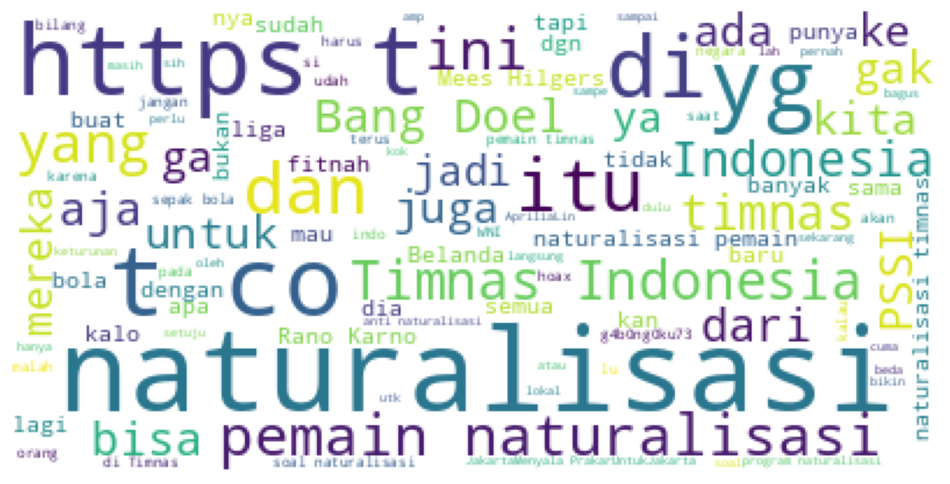

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white").generate(" ".join(df['full_text']))

# Plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

# To remove the axis value
plt.axis("off")
plt.show()


In [ ]:
df['clean_text'] = df['full_text'].str.lower()
df['Hastag'], df['clean_text'] = zip(*df['clean_text'].apply(lambda x: extract_hashtags(x, remove=True)))
df['mentions'], df['clean_text'] = zip(*df['clean_text'].apply(lambda x: extract_mentions(x, remove=True)))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_pattern(x,r'https?://\S+|www\.\S+'))
df['clean_text']=df['clean_text'].apply(lambda x : remove_pattern(x,r'\brt\b'))
df['clean_text']=df['clean_text'].apply(lambda x : remove_pattern(x,r'\[.*?\]'))
df['clean_text']=df['clean_text'].apply(lambda x : remove_pattern(x,r'[^\x00-\x7F]+'))
df['clean_text']=df['clean_text'].apply(lambda x : remove_pattern(x,r'\bt.me\b\S+'))
df['clean_text']=df['clean_text'].apply(lambda x: remove_pattern(x,r'&\w+'))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_pattern(x,r'\d+'))
# df['clean_text'] = df['clean_text'].apply(lambda x: remove_punc(x))
df['len'] = df['full_text'].apply(lambda x: len(x))

In [ ]:
df[['username','created_at','full_text','clean_text', 'Hastag', 'mentions', 'len','quote_count', 'reply_count', 'retweet_count']]

username                      created_at  \
0         kopiiid19  Thu Sep 26 18:44:44 +0000 2024   
1    _pdfperjuangan  Thu Sep 26 18:38:25 +0000 2024   
2    _pdfperjuangan  Thu Sep 26 18:36:53 +0000 2024   
3    20gallantoarbi  Thu Sep 26 18:10:22 +0000 2024   
4           G336387  Thu Sep 26 18:03:51 +0000 2024   
..              ...                             ...   
455    SetoPray1212  Sun Sep 22 08:41:22 +0000 2024   
456       bolacomID  Sun Sep 22 08:22:04 +0000 2024   
457   turunminum_id  Sun Sep 22 08:18:58 +0000 2024   
458    BolaSportcom  Sun Sep 22 07:55:13 +0000 2024   
459  kalulutmeratus  Sun Sep 22 07:34:36 +0000 2024   

                                             full_text  \
0    tak payah korang kena cari pemain kat Belanda ...   
1    @tekarok007 @LelePecel150424 Dan disini gw set...   
2    @tekarok007 @LelePecel150424 TOLOL kalo lo bil...   
3    @Denny50250626 @Sniffing_Lead @InfosuporterID ...   
4    Para pendukung cagub pesaing PDIP bikin fitden...   
..                                                 ...   
455  @erickthohir Terima kasih Pa Erick sudah bisa ...   
456  Pemain Naturalisasi Timnas Indonesia Sempat Te...   
457  Mees Hilgers dan Eliano Reijnders disumpah WNI...   
458  Naturalisasi pemain keturunan memang sedang ge...   
459  @fdnan_u Saran saya tidak hanya membahas hasil...   

                                            clean_text  \
0    tak payah korang kena cari pemain kat belanda ...   
1      dan disini gw setuju program naturalisasi. k...   
2      tolol kalo lo bilang pemain yg punya half-bl...   
3       sty berani kasih statemen ngambang soal elk...   
4    para pendukung cagub pesaing pdip bikin fitden...   
..                                                 ...   
455   terima kasih pa erick sudah bisa mengangkat d...   
456  pemain naturalisasi timnas indonesia sempat te...   
457  mees hilgers dan eliano reijnders disumpah wni...   
458  naturalisasi pemain keturunan memang sedang ge...   
459   saran saya tidak hanya membahas hasil pertand...   

                                                Hastag  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
455                                                NaN   
456                                                NaN   
457  [#meeshilgers, #elianoreijnders, #timnasindone...   
458         [#erickthohir, #timnas, #indonesia, #pssi]   
459                                                NaN   

                                              mentions  len  quote_count  \
0                                                  NaN  121            0   
1                      [@tekarok007, @lelepecel150424]  123            0   
2                      [@tekarok007, @lelepecel150424]  269            0   
3    [@denny50250626, @sniffing_lead, @infosuporterid]  268            0   
4                                                  NaN  283            0   
..                                                 ...  ...          ...   
455                                     [@erickthohir]  282            0   
456                                                NaN  144            0   
457                                                NaN  299            0   
458                                                NaN  262            0   
459                                         [@fdnan_u]  230            0   

     reply_count  retweet_count  
0              2              0  
1              0              0  
2              1              0  
3              2              0  
4              0              0  
..           ...            ...  
455            0              0  
456            0              0  
457            0              0  
458   

In [ ]:
# Pecah kolom 'mentions' menjadi satu baris per mention
edge_list = df.explode('mentions')[['username', 'mentions']]

# Ubah nama kolom agar sesuai untuk analisis jaringan
edge_list = edge_list.rename(columns={'username': 'source', 'mentions': 'target'})
# Hapus baris dengan mention kosong (jika ada)
edge_list = edge_list[edge_list['target'].notna() & (edge_list['target'] != '')]

# Optional: reset index
edge_list = edge_list.reset_index(drop=True)

# Lihat hasilnya
print(edge_list.head())

           source            target
0  _pdfperjuangan       @tekarok007
1  _pdfperjuangan  @lelepecel150424
2  _pdfperjuangan       @tekarok007
3  _pdfperjuangan  @lelepecel150424
4  20gallantoarbi    @denny50250626


In [ ]:
import networkx as nx
my_graph = nx.from_pandas_edgelist(
    edge_list,
    source='source',
    target='target',
    create_using=nx.DiGraph()
)


In [ ]:
type(my_graph)

networkx.classes.digraph.DiGraph

In [ ]:
print(f" Jenis Graph     : {'Directed' if my_graph.is_directed() else 'Undirected'}")
print(f" Jumlah Node     : {my_graph.number_of_nodes()}")
print(f" Jumlah Edge     : {my_graph.number_of_edges()}")
print(f" Daftar Node     : {list(my_graph.nodes())[:5]} ...")
print(f"  Daftar Edge     : {list(my_graph.edges())[:5]} ...")


 Jenis Graph     : Directed
 Jumlah Node     : 471
 Jumlah Edge     : 513
 Daftar Node     : ['_pdfperjuangan', '@tekarok007', '@lelepecel150424', '20gallantoarbi', '@denny50250626'] ...
  Daftar Edge     : [('_pdfperjuangan', '@tekarok007'), ('_pdfperjuangan', '@lelepecel150424'), ('20gallantoarbi', '@denny50250626'), ('20gallantoarbi', '@sniffing_lead'), ('20gallantoarbi', '@infosuporterid')] ...


In [ ]:
my_graph.nodes()

NodeView(('_pdfperjuangan', '@tekarok007', '@lelepecel150424', '20gallantoarbi', '@denny50250626', '@sniffing_lead', '@infosuporterid', '6959milesapart', '@goxjim1', '@im_zolan', '@agusikiloh', 'aprill_mop', '@powerkw1', '@colamandala', '@riadjuwita', '@astrianelsa', '@gilabola_ina', '@erickthohir', 'dbulat993', '@besokmaudiet', '@id_fm', 'Clarenceamadeus', '@ibetibetibetttt', '@tetapinginhidup', '@pureblood_4ever', 'monica_zero', 'gadit46', '@cfc_rajvinder', '@theaseanball', 'anakesemde', '@siaranbolalive', 'TheaRizkyyy', '@mafiawasit', 'dymskiii', '@ria_eyo', 'WicahyoSigit', '@thegoatnunezidn', '@sofyan_juve1897', '@updatebolabola', 'eitiqa', '@zkm411', 'donnapf', '@tham878', 'Nicoadic', '@elanogavilan', 'AdalahKunc32781', '@urrangawak', 'AisyPriantoro', '@chesscomid', '@anak__ogi', '@aprilialin', '@g4b0ng0ku73', '@antoniuscdn', '@03__nakula', '@aryprasetyo85', '@elsaday__', '@seruanhl', '@denni_sauya', 'tekarok007', 'KTheology46243', '@utdfocusid', '@bliblidotcom', 'LelePecel150424'

In [ ]:
my_graph.edges()

OutEdgeView([('_pdfperjuangan', '@tekarok007'), ('_pdfperjuangan', '@lelepecel150424'), ('20gallantoarbi', '@denny50250626'), ('20gallantoarbi', '@sniffing_lead'), ('20gallantoarbi', '@infosuporterid'), ('6959milesapart', '@goxjim1'), ('6959milesapart', '@im_zolan'), ('6959milesapart', '@agusikiloh'), ('aprill_mop', '@powerkw1'), ('aprill_mop', '@colamandala'), ('aprill_mop', '@riadjuwita'), ('aprill_mop', '@astrianelsa'), ('aprill_mop', '@gilabola_ina'), ('aprill_mop', '@erickthohir'), ('dbulat993', '@besokmaudiet'), ('dbulat993', '@id_fm'), ('Clarenceamadeus', '@ibetibetibetttt'), ('Clarenceamadeus', '@tetapinginhidup'), ('Clarenceamadeus', '@pureblood_4ever'), ('monica_zero', '@id_fm'), ('gadit46', '@cfc_rajvinder'), ('gadit46', '@theaseanball'), ('anakesemde', '@siaranbolalive'), ('TheaRizkyyy', '@mafiawasit'), ('TheaRizkyyy', '@nahajang22'), ('TheaRizkyyy', '@mbrobbyy'), ('TheaRizkyyy', '@bahaspemainbola'), ('dymskiii', '@ria_eyo'), ('WicahyoSigit', '@thegoatnunezidn'), ('WicahyoS

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

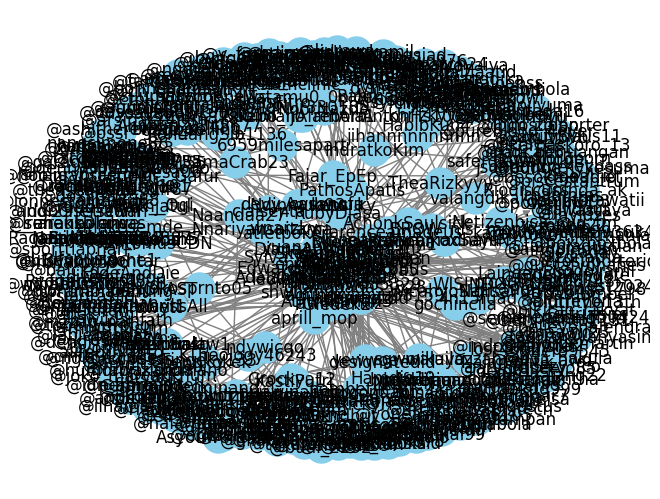

In [ ]:
import warnings
warnings.filterwarnings("ignore")
nx.draw(my_graph, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray')

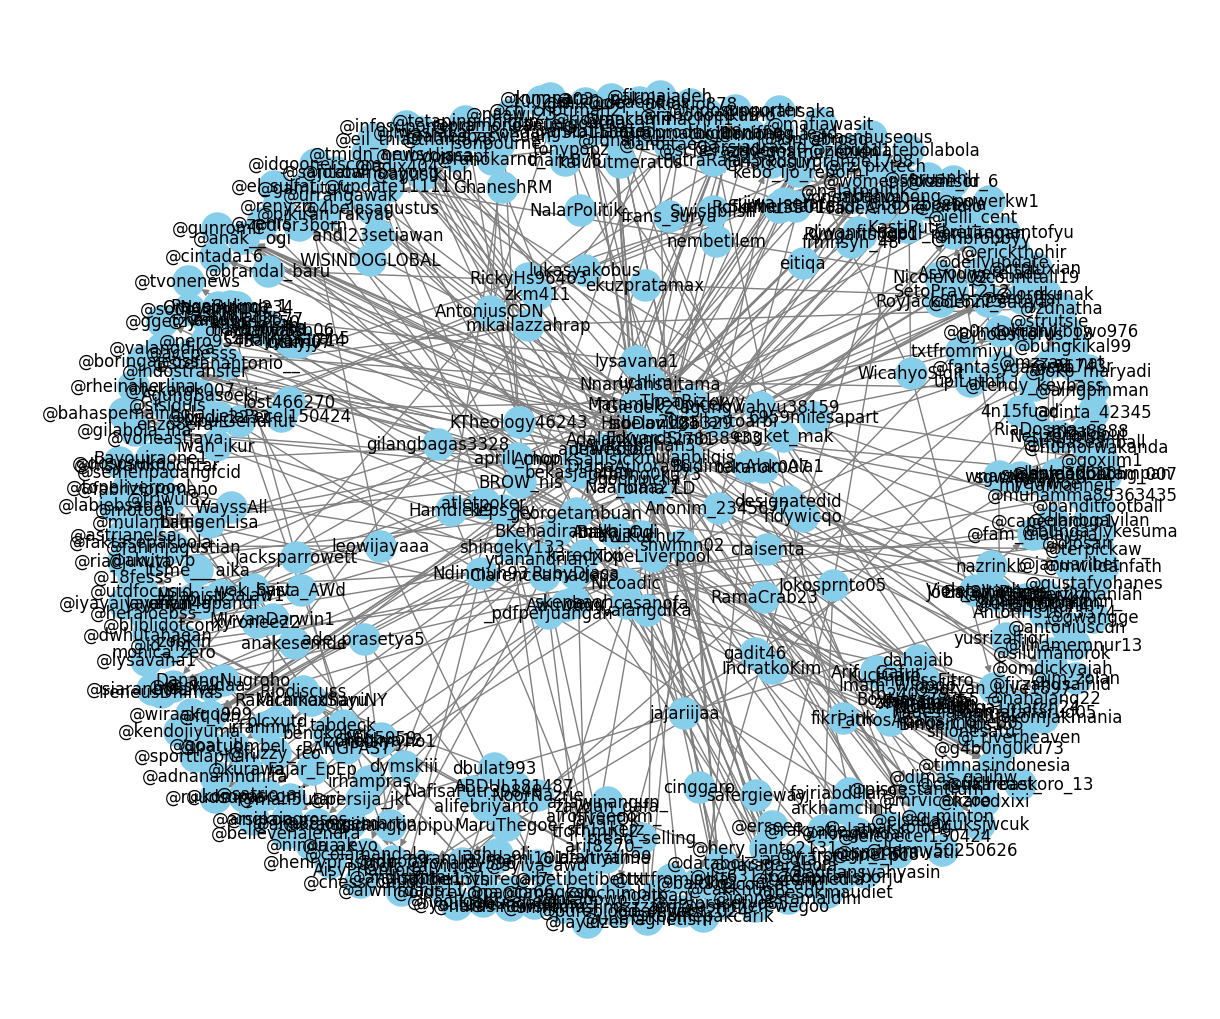

In [ ]:
plt.figure(figsize=(12, 10))
nx.draw(my_graph, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray')


In [ ]:
nx.degree(my_graph)

DiDegreeView({'_pdfperjuangan': 2, '@tekarok007': 4, '@lelepecel150424': 2, '20gallantoarbi': 3, '@denny50250626': 1, '@sniffing_lead': 1, '@infosuporterid': 9, '6959milesapart': 3, '@goxjim1': 1, '@im_zolan': 1, '@agusikiloh': 1, 'aprill_mop': 6, '@powerkw1': 1, '@colamandala': 1, '@riadjuwita': 1, '@astrianelsa': 1, '@gilabola_ina': 3, '@erickthohir': 8, 'dbulat993': 2, '@besokmaudiet': 1, '@id_fm': 5, 'Clarenceamadeus': 3, '@ibetibetibetttt': 1, '@tetapinginhidup': 1, '@pureblood_4ever': 1, 'monica_zero': 1, 'gadit46': 2, '@cfc_rajvinder': 1, '@theaseanball': 2, 'anakesemde': 1, '@siaranbolalive': 3, 'TheaRizkyyy': 4, '@mafiawasit': 5, 'dymskiii': 1, '@ria_eyo': 1, 'WicahyoSigit': 3, '@thegoatnunezidn': 1, '@sofyan_juve1897': 1, '@updatebolabola': 12, 'eitiqa': 2, '@zkm411': 3, 'donnapf': 1, '@tham878': 1, 'Nicoadic': 2, '@elanogavilan': 1, 'AdalahKunc32781': 18, '@urrangawak': 5, 'AisyPriantoro': 1, '@chesscomid': 1, '@anak__ogi': 6, '@aprilialin': 21, '@g4b0ng0ku73': 23, '@antoniu

In [ ]:
edge_list[(edge_list.source == '_pdfperjuangan') | (edge_list.target == '_pdfperjuangan')]

source            target
0  _pdfperjuangan       @tekarok007
1  _pdfperjuangan  @lelepecel150424
2  _pdfperjuangan       @tekarok007
3  _pdfperjuangan  @lelepecel150424

In [ ]:
print(nx.degree(my_graph, "@g4b0ng0ku73"))
edge_list[(edge_list.source == '@g4b0ng0ku73') | (edge_list.target == '@g4b0ng0ku73')]

23


source        target
39   AdalahKunc32781  @g4b0ng0ku73
213     Imam_Widodo_  @g4b0ng0ku73
228         rb240279  @g4b0ng0ku73
229     BoyHota78755  @g4b0ng0ku73
230     BoyHota78755  @g4b0ng0ku73
234  EdwardSimb38933  @g4b0ng0ku73
244  EdwardSimb38933  @g4b0ng0ku73
313      IndratkoKim  @g4b0ng0ku73
339        Anak__Ogi  @g4b0ng0ku73
358       hadesiamah  @g4b0ng0ku73
367      mulanbilqis  @g4b0ng0ku73
402   BinderClips155  @g4b0ng0ku73
403      sijionesatu  @g4b0ng0ku73
413        Anak__Ogi  @g4b0ng0ku73
421         KuciGaro  @g4b0ng0ku73
443       PambudiTri  @g4b0ng0ku73
445      Arif__Gafur  @g4b0ng0ku73
446          Noesa06  @g4b0ng0ku73
447       kalpanyata  @g4b0ng0ku73
450          wnarzky  @g4b0ng0ku73
453     nanosimone88  @g4b0ng0ku73
455  AdalahKunc32781  @g4b0ng0ku73
457     PathosApatis  @g4b0ng0ku73
462       zero_stamp  @g4b0ng0ku73
463        DjoehartD  @g4b0ng0ku73
490       engket_mak  @g4b0ng0ku73
492        Bakhjatul  @g4b0ng0ku73

# Centrality Analysis

In [ ]:
#most influental
most_influental = nx.degree_centrality(my_graph)
for w in sorted(most_influental, key=most_influental.get, reverse=True):
    print(w, round(most_influental[w],4))

@g4b0ng0ku73 0.0489
@aprilialin 0.0447
georgetambuan 0.0426
AdalahKunc32781 0.0383
@idextratime 0.0277
g4b0ng0ku73 0.0277
@updatebolabola 0.0255
bekasjajahan 0.0255
awikuchuz 0.0255
@bliblidotcom 0.0234
@onefootballm 0.0234
EdwardSimb38933 0.0234
TGledek2 0.0234
_bima_LD 0.0213
mulanbilqis 0.0213
@infosuporterid 0.0191
Atlitrebahan3 0.0191
@erickthohir 0.017
@indostransfer 0.017
antiwestoid 0.017
dearnoto 0.017
@03__nakula 0.0149
@utdfocusid 0.0149
HsbDavid85329 0.0149
aprill_mop 0.0128
@anak__ogi 0.0128
@aryprasetyo85 0.0128
@womensfootie_id 0.0128
@concacafid 0.0128
@indosupporter 0.0128
@garagarabola_ 0.0128
@ft_idn 0.0128
@idn_abroad 0.0128
@timnasindonesia 0.0128
@id_fm 0.0106
@mafiawasit 0.0106
@urrangawak 0.0106
@antoniuscdn 0.0106
@seruanhl 0.0106
KTheology46243 0.0106
@humorjontampan 0.0106
DianaAurora96 0.0106
MIrvanDarwin1 0.0106
AntoniusCDN 0.0106
Ndinmuh93 0.0106
@unmagnetism 0.0106
claisenta 0.0106
@tekarok007 0.0085
TheaRizkyyy 0.0085
@elsaday__ 0.0085
@denni_sauya 0.008

In [ ]:
most_importance = nx.eigenvector_centrality(my_graph, max_iter=1000)
for w in sorted(most_importance, key=most_importance.get, reverse=True):
    print(w, round(most_importance[w], 4))


@g4b0ng0ku73 0.4315
@aprilialin 0.394
@idextratime 0.244
@updatebolabola 0.2252
@bliblidotcom 0.2064
@onefootballm 0.2064
@infosuporterid 0.1689
@erickthohir 0.1502
@indostransfer 0.1502
@03__nakula 0.1314
@utdfocusid 0.1314
@anak__ogi 0.1127
@aryprasetyo85 0.1127
@womensfootie_id 0.1127
@concacafid 0.1127
@indosupporter 0.1127
@garagarabola_ 0.1127
@ft_idn 0.1127
@idn_abroad 0.1127
@timnasindonesia 0.1127
@id_fm 0.0939
@mafiawasit 0.0939
@urrangawak 0.0939
@antoniuscdn 0.0939
@seruanhl 0.0939
@humorjontampan 0.0939
@unmagnetism 0.0939
@tekarok007 0.0752
@elsaday__ 0.0752
@denni_sauya 0.0752
@gunromli 0.0752
@ch_chotimah2 0.0752
@tmidn_news 0.0752
@bahaspemainbola 0.0752
@hooligansceneid 0.0752
@gilabola_ina 0.0564
@siaranbolalive 0.0564
@zkm411 0.0564
@__anakkolong 0.0564
@anitaiflaatid 0.0564
@goal_id 0.0564
@nahajang22 0.0564
@petergontha 0.0564
@idho09 0.0564
@lelepecel150424 0.0377
@theaseanball 0.0377
@jhonsitorus_18 0.0377
@eil_thia 0.0377
@cintada16 0.0377
@firzahusainid 0.0377

In [ ]:
#best connector
best_connector = nx.betweenness_centrality(my_graph)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, round(best_connector[w], 4))

_pdfperjuangan 0.0
@tekarok007 0.0
@lelepecel150424 0.0
20gallantoarbi 0.0
@denny50250626 0.0
@sniffing_lead 0.0
@infosuporterid 0.0
6959milesapart 0.0
@goxjim1 0.0
@im_zolan 0.0
@agusikiloh 0.0
aprill_mop 0.0
@powerkw1 0.0
@colamandala 0.0
@riadjuwita 0.0
@astrianelsa 0.0
@gilabola_ina 0.0
@erickthohir 0.0
dbulat993 0.0
@besokmaudiet 0.0
@id_fm 0.0
Clarenceamadeus 0.0
@ibetibetibetttt 0.0
@tetapinginhidup 0.0
@pureblood_4ever 0.0
monica_zero 0.0
gadit46 0.0
@cfc_rajvinder 0.0
@theaseanball 0.0
anakesemde 0.0
@siaranbolalive 0.0
TheaRizkyyy 0.0
@mafiawasit 0.0
dymskiii 0.0
@ria_eyo 0.0
WicahyoSigit 0.0
@thegoatnunezidn 0.0
@sofyan_juve1897 0.0
@updatebolabola 0.0
eitiqa 0.0
@zkm411 0.0
donnapf 0.0
@tham878 0.0
Nicoadic 0.0
@elanogavilan 0.0
AdalahKunc32781 0.0
@urrangawak 0.0
AisyPriantoro 0.0
@chesscomid 0.0
@anak__ogi 0.0
@aprilialin 0.0
@g4b0ng0ku73 0.0
@antoniuscdn 0.0
@03__nakula 0.0
@aryprasetyo85 0.0
@elsaday__ 0.0
@seruanhl 0.0
@denni_sauya 0.0
tekarok007 0.0
KTheology46243 0.0

In [ ]:
# Closest connector (Closeness Centrality)
best_connector = nx.closeness_centrality(my_graph)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, round(best_connector[w], 4))


@g4b0ng0ku73 0.0489
@aprilialin 0.0447
@idextratime 0.0277
@updatebolabola 0.0255
@bliblidotcom 0.0234
@onefootballm 0.0234
@infosuporterid 0.0191
@erickthohir 0.017
@indostransfer 0.017
@03__nakula 0.0149
@utdfocusid 0.0149
@anak__ogi 0.0128
@aryprasetyo85 0.0128
@womensfootie_id 0.0128
@concacafid 0.0128
@indosupporter 0.0128
@garagarabola_ 0.0128
@ft_idn 0.0128
@idn_abroad 0.0128
@timnasindonesia 0.0128
@id_fm 0.0106
@mafiawasit 0.0106
@urrangawak 0.0106
@antoniuscdn 0.0106
@seruanhl 0.0106
@humorjontampan 0.0106
@unmagnetism 0.0106
@tekarok007 0.0085
@elsaday__ 0.0085
@denni_sauya 0.0085
@gunromli 0.0085
@ch_chotimah2 0.0085
@tmidn_news 0.0085
@bahaspemainbola 0.0085
@hooligansceneid 0.0085
@gilabola_ina 0.0064
@siaranbolalive 0.0064
@zkm411 0.0064
@__anakkolong 0.0064
@anitaiflaatid 0.0064
@goal_id 0.0064
@nahajang22 0.0064
@petergontha 0.0064
@idho09 0.0064
@lelepecel150424 0.0043
@theaseanball 0.0043
@jhonsitorus_18 0.0043
@eil_thia 0.0043
@cintada16 0.0043
@firzahusainid 0.0043

In [ ]:
grub1 = nx.bfs_tree(my_graph, "20gallantoarbi")
grub2 = nx.bfs_tree(my_graph, "_pdfperjuangan")

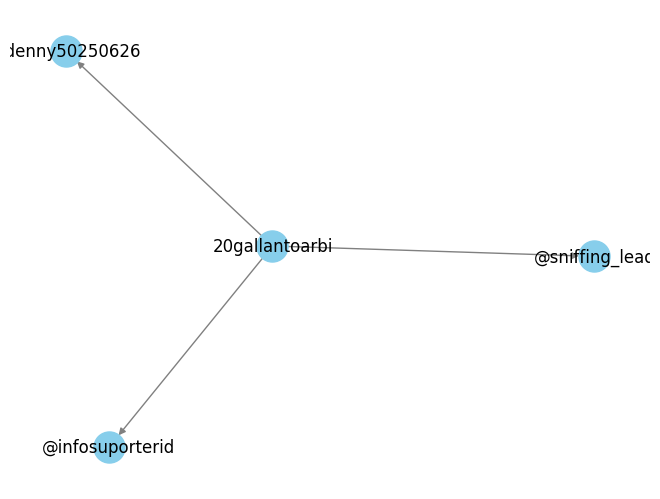

In [ ]:
nx.draw(grub1, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray')

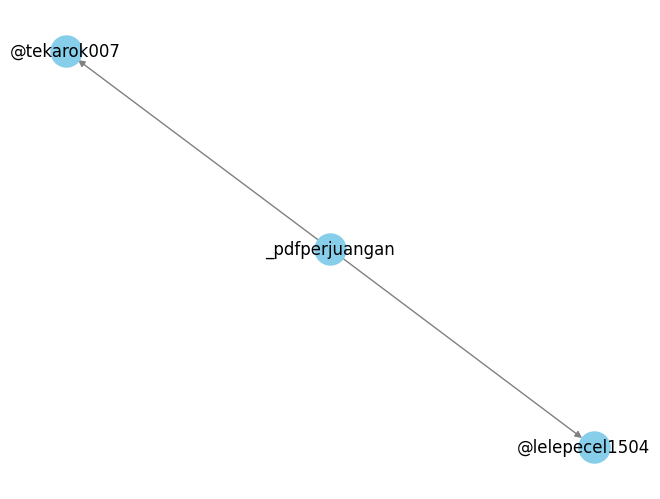

In [ ]:
nx.draw(grub2, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray')

In [ ]:
from networkx.algorithms.community import girvan_newman

# Ambil komunitas awal (level pertama pemisahan)
communities_generator = girvan_newman(my_graph)
first_level_communities = next(communities_generator)
communities = [list(community) for community in first_level_communities]

# Tampilkan hasil komunitas
for i, c in enumerate(communities):
    print(f"Komunitas {i+1}: {c}")


Komunitas 1: ['rb240279', 'EdwardSimb38933', 'luckyj0', '@andisantai1', 'WISINDOGLOBAL', 'PambudiTri', 'Rayyan1714', 'izoneismyno1', '@bunga_jykesuma', '@mulanbilqis', 'DianaAurora96', 'Ndinmuh93', '@__anakkolong', 'sgwwaluyo', 'JavanOk', '@denni_sauya', 'airoffreedom_', 'MilanistiSalaw1', '@dior3born', '@anaktangsiad', 'BoyHota78755', '@lysavana1', 'Naandaa27', 'aharisth', 'Bakhjatul', 'layanan4g', 'lysavana1', 'randoE43877', 'tham878', 'EndlessFitro', '@counttall19', 'dtono88', 'NalarPolitik_', '@stefanantonio__', '@pssi', 'Omonmencle', '@firzahusainid', '@omdickyajah', '@naawii23', '@eil_thia', 'awikuchuz', 'devy_casanofa', '@cintada16', 'aleale366105', '@g4b0ng0ku73', '@idextratime', '@gunromli', '@paltiwest2024', 'haya_purba', 'jacksparrowett', 'Imam_Widodo_', '@aprilialin', 'budakbaong_007', '@kendojiyuma', '@petergontha', '@infokomjakmania', '@rhmtmuslim', 'LelePecel150424', 'str11kerz', 'nanosimone88', '@satrio_aji_', 'AntoniusCDN', '@urrangawak', '@anak__ogi', '@ranokarno_', '

# Comunity Detection Clustering & Social Network

Komunitas 1: ['rb240279', 'EdwardSimb38933', 'luckyj0', '@andisantai1', 'WISINDOGLOBAL', 'PambudiTri', 'Rayyan1714', 'izoneismyno1', '@bunga_jykesuma', '@mulanbilqis', 'DianaAurora96', 'Ndinmuh93', '@__anakkolong', 'sgwwaluyo', 'JavanOk', '@denni_sauya', 'airoffreedom_', 'MilanistiSalaw1', '@dior3born', '@anaktangsiad', 'BoyHota78755', '@lysavana1', 'Naandaa27', 'aharisth', 'Bakhjatul', 'layanan4g', 'lysavana1', 'randoE43877', 'tham878', 'EndlessFitro', '@counttall19', 'dtono88', 'NalarPolitik_', '@stefanantonio__', '@pssi', 'Omonmencle', '@firzahusainid', '@omdickyajah', '@naawii23', '@eil_thia', 'awikuchuz', 'devy_casanofa', '@cintada16', 'aleale366105', '@g4b0ng0ku73', '@idextratime', '@gunromli', '@paltiwest2024', 'haya_purba', 'jacksparrowett', 'Imam_Widodo_', '@aprilialin', 'budakbaong_007', '@kendojiyuma', '@petergontha', '@infokomjakmania', '@rhmtmuslim', 'LelePecel150424', 'str11kerz', 'nanosimone88', '@satrio_aji_', 'AntoniusCDN', '@urrangawak', '@anak__ogi', '@ranokarno_', '

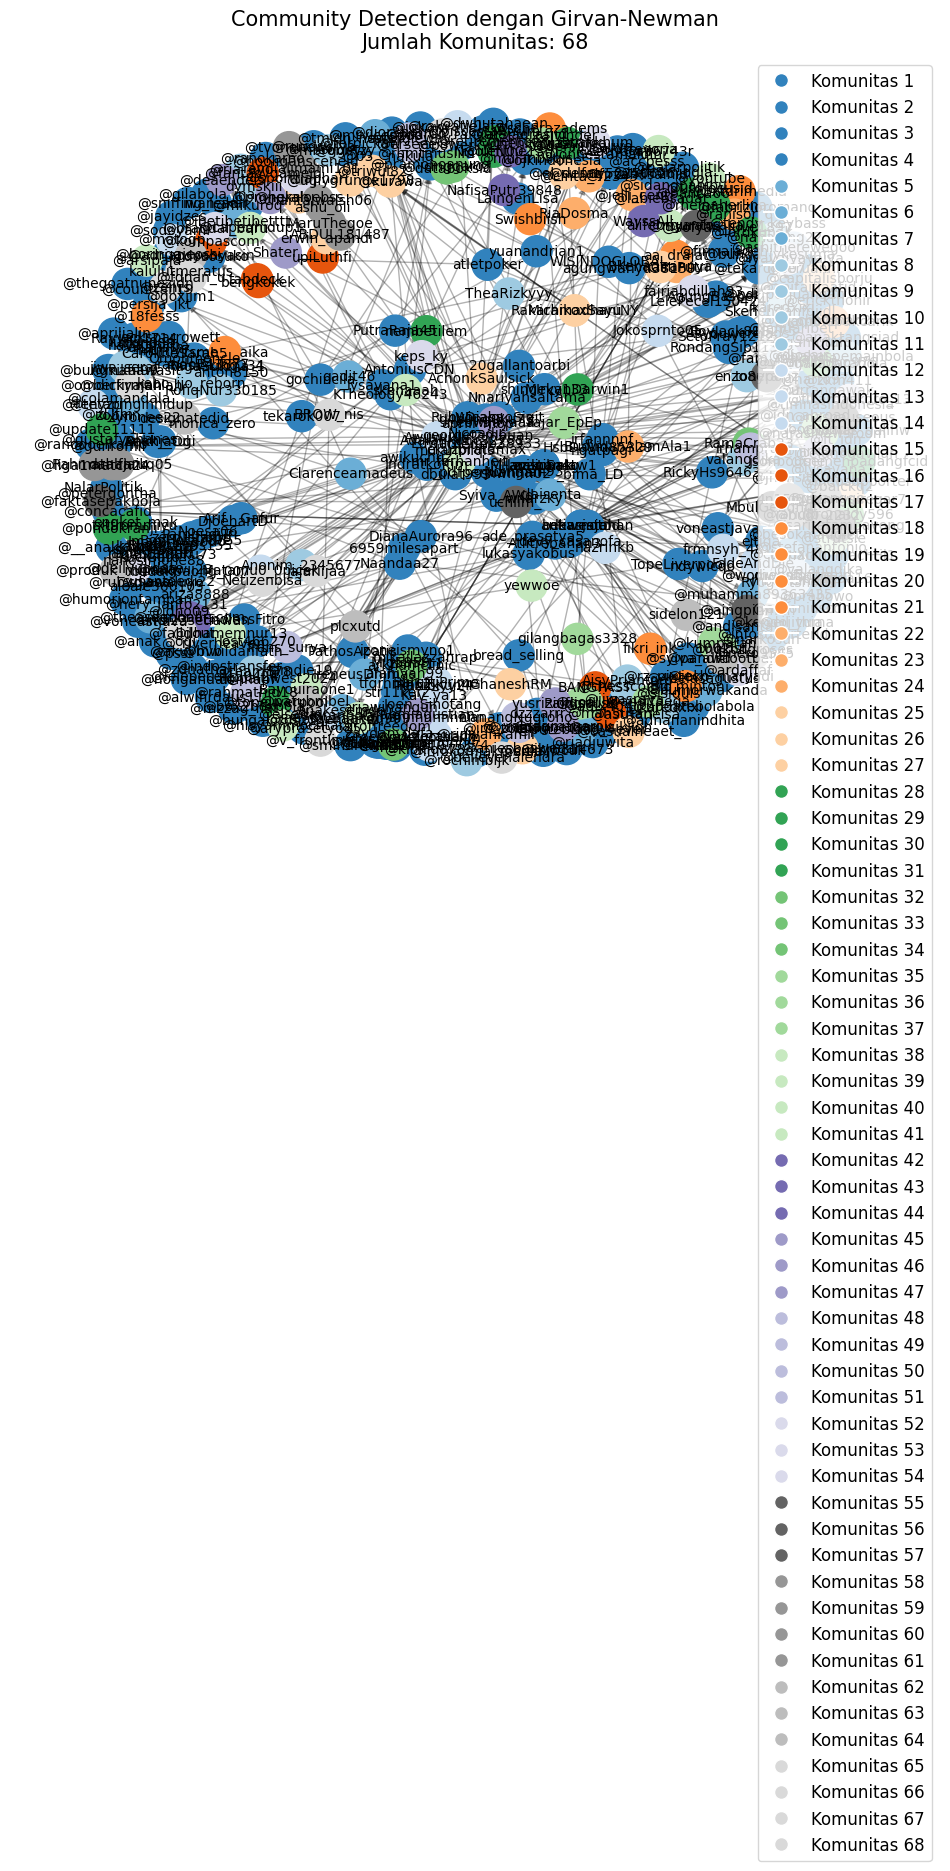

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import girvan_newman
import matplotlib.cm as cm

# Ambil komunitas awal (level pertama pemisahan)
communities_generator = girvan_newman(my_graph)
first_level_communities = next(communities_generator)
communities = [list(community) for community in first_level_communities]

# Tampilkan hasil komunitas
for i, c in enumerate(communities):
    print(f"Komunitas {i+1}: {c}")

# Visualisasi graf dengan informasi yang jelas
pos = nx.spring_layout(my_graph, seed=42)  # Layout dengan seed agar stabil

# Menggunakan colormap untuk mewarnai komunitas
cmap = cm.get_cmap('tab20c', len(communities))  # Pilih colormap yang cukup banyak warna

plt.figure(figsize=(12, 10))

# Gambar nodes dengan warna sesuai komunitas
for i, community in enumerate(communities):
    # Set warna untuk node dalam komunitas tertentu
    node_color = [cmap(i)] * len(community)  # Semua node dalam komunitas mendapat warna yang sama
    nx.draw_networkx_nodes(my_graph, pos, nodelist=community, node_size=500, node_color=node_color, label=f"Komunitas {i+1}")

# Gambar edges
nx.draw_networkx_edges(my_graph, pos, alpha=0.3)

# Gambar label untuk node
nx.draw_networkx_labels(my_graph, pos, font_size=10)

# Tambahkan informasi judul dan legendaris
plt.title(f"Community Detection dengan Girvan-Newman\nJumlah Komunitas: {len(communities)}", fontsize=15)
plt.axis("off")  # Matikan sumbu

# Buat legend untuk setiap komunitas
handles = []
for i in range(len(communities)):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f"Komunitas {i+1}",
                               markersize=10, markerfacecolor=cmap(i)))
plt.legend(handles=handles, loc='upper right', fontsize=12)

# Tampilkan plot
plt.show()


Jumlah komunitas yang terdeteksi: 76


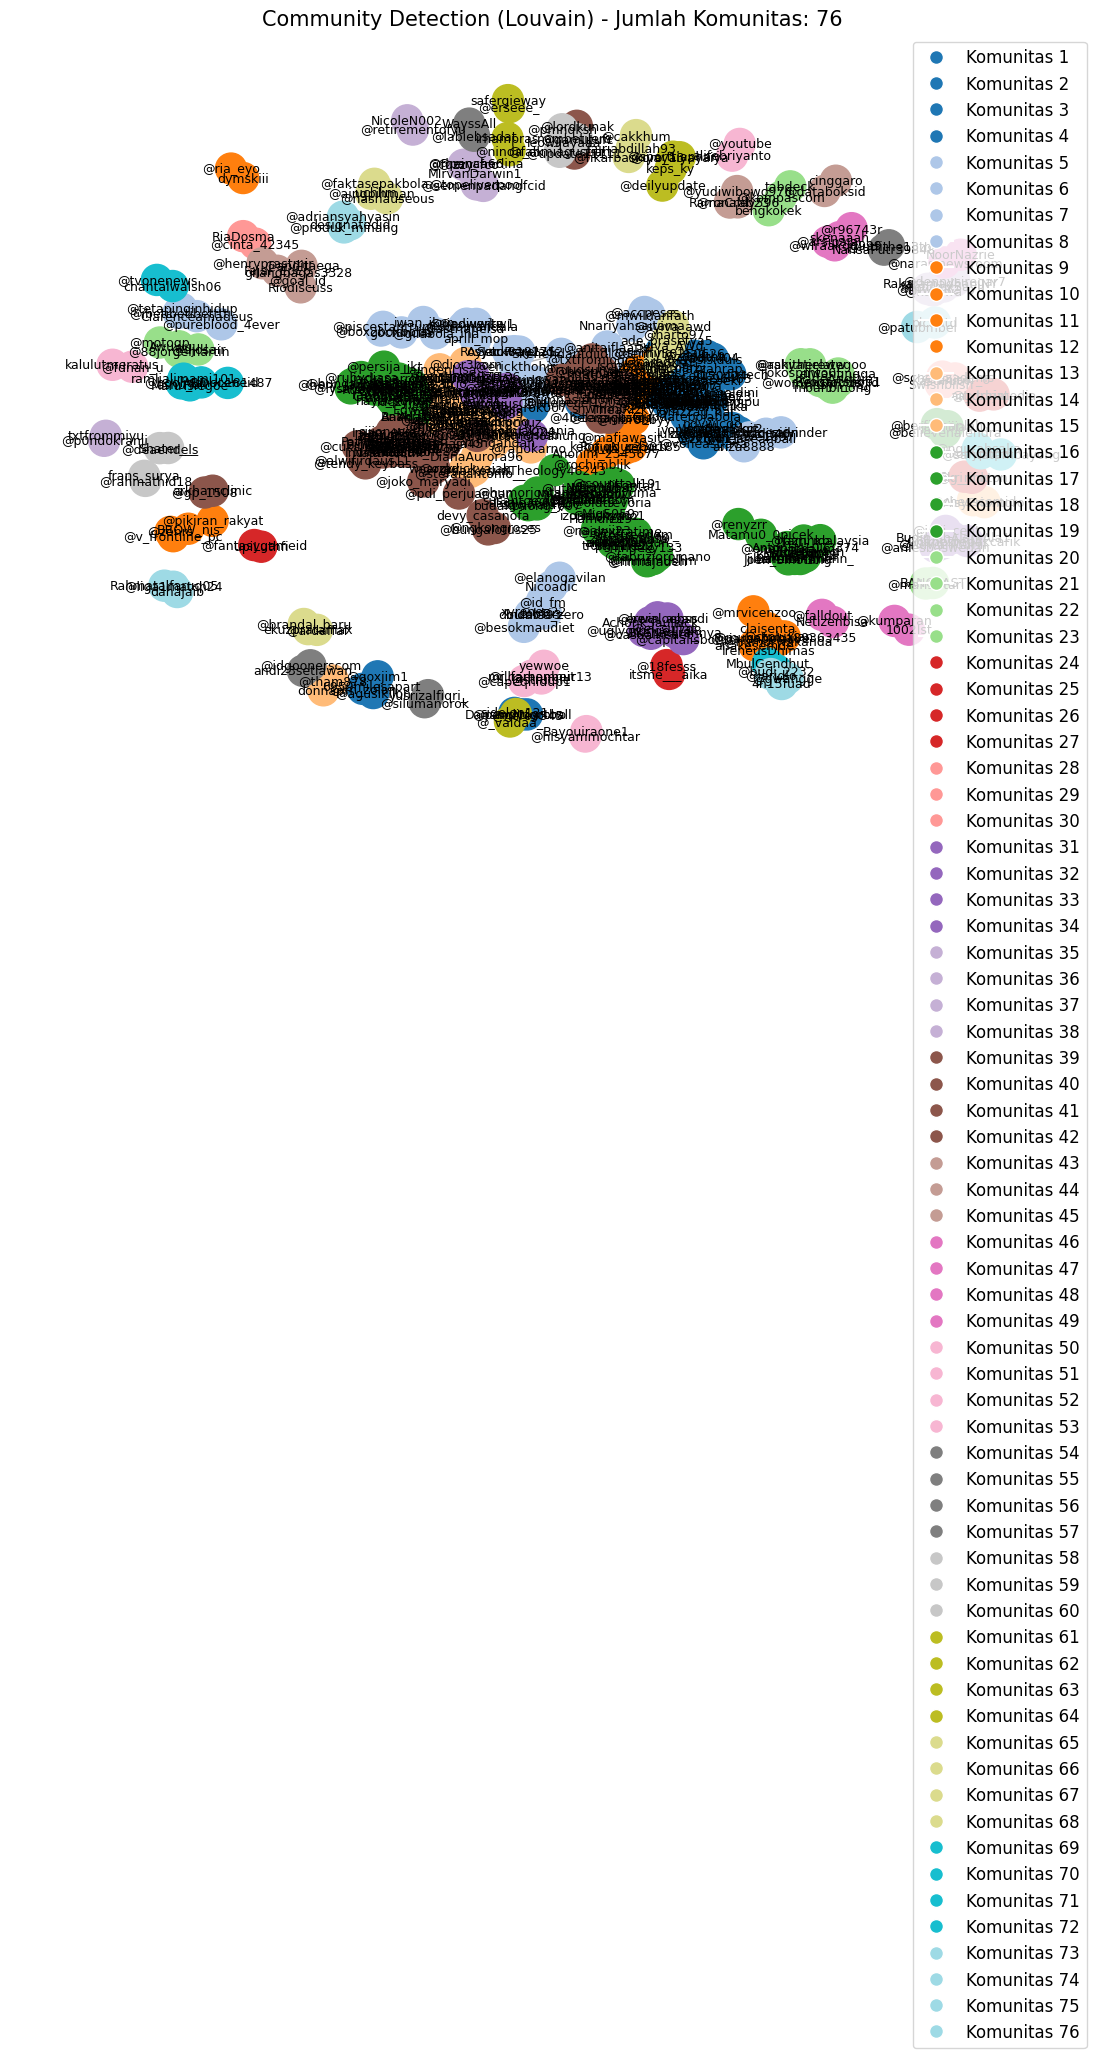

In [ ]:
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx

# Ubah ke graf tak berarah agar Louvain bisa dijalankan
undirected_graph = my_graph.to_undirected()

# Dapatkan partisi komunitas
partition = community_louvain.best_partition(undirected_graph)

# Hitung jumlah komunitas
num_communities = len(set(partition.values()))
print(f"Jumlah komunitas yang terdeteksi: {num_communities}")

# Layout posisi node (stabil)
pos = nx.spring_layout(undirected_graph, seed=42)

# Warna untuk setiap komunitas
cmap = cm.get_cmap('tab20', num_communities)  # Tab20 memiliki cukup banyak warna

plt.figure(figsize=(14, 10))

# Gambar nodes dengan warna berdasarkan komunitas
for i in range(num_communities):
    # Dapatkan node untuk komunitas i
    nodes_in_community = [node for node, comm in partition.items() if comm == i]
    # Gambar nodes dengan warna yang sesuai
    nx.draw_networkx_nodes(undirected_graph, pos, nodelist=nodes_in_community,
                           node_size=500, node_color=[cmap(i)] * len(nodes_in_community))

# Gambar edges
nx.draw_networkx_edges(undirected_graph, pos, alpha=0.3)

# Gambar label untuk node
nx.draw_networkx_labels(undirected_graph, pos, font_size=9)

# Menambahkan informasi jumlah komunitas ke dalam judul
plt.title(f"Community Detection (Louvain) - Jumlah Komunitas: {num_communities}", fontsize=15)

# Menambahkan legend untuk komunitas
handles = []
for i in range(num_communities):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f"Komunitas {i+1}",
                               markersize=10, markerfacecolor=cmap(i)))
plt.legend(handles=handles, loc='upper right', fontsize=12)

# Matikan sumbu untuk tampilan yang lebih bersih
plt.axis("off")

# Tampilkan visualisasi
plt.show()


Jumlah komunitas yang terdeteksi: 120


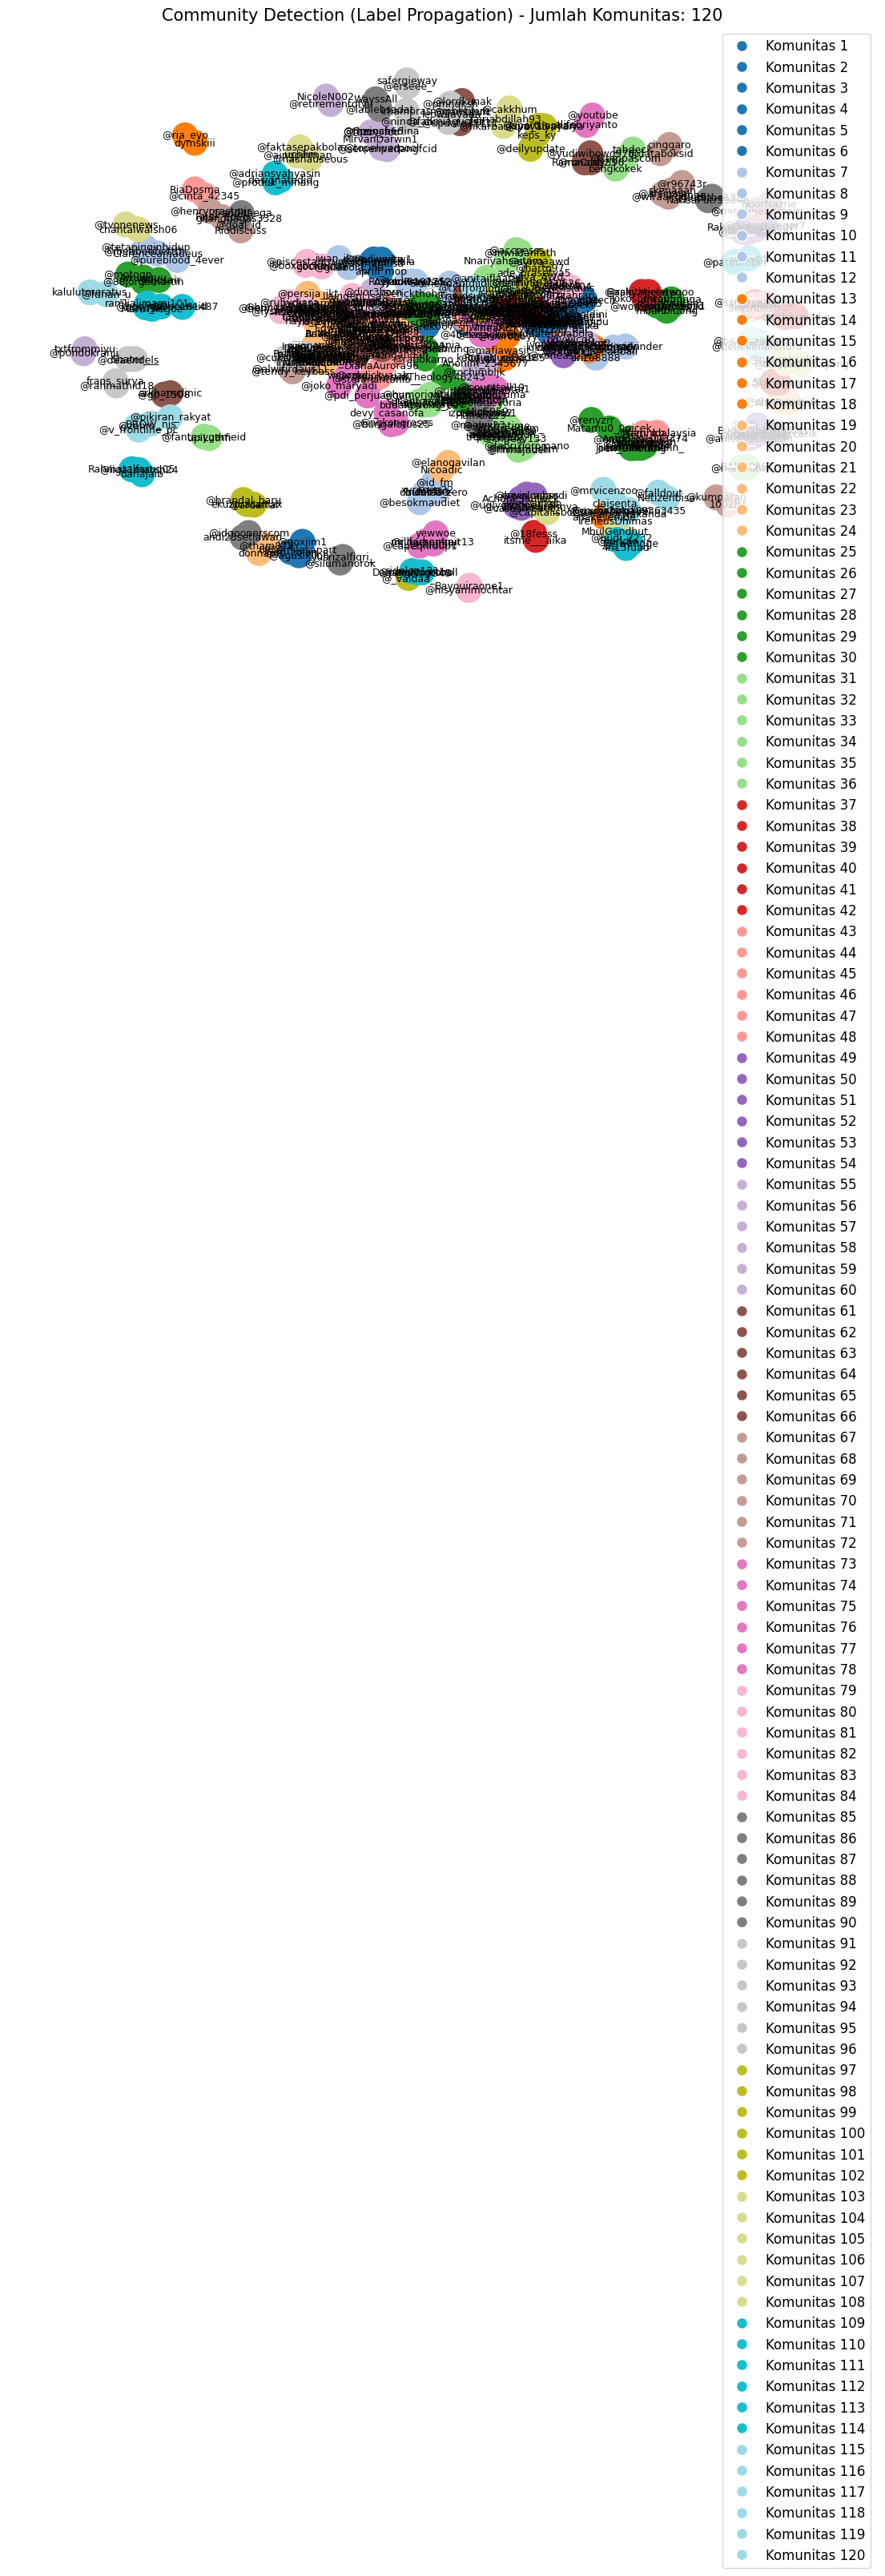

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Ubah graf menjadi tak berarah
undirected_graph = my_graph.to_undirected()

# Menggunakan Label Propagation Algorithm dari NetworkX
lpa_communities = list(nx.community.label_propagation_communities(undirected_graph))

# Hitung jumlah komunitas
num_communities = len(lpa_communities)
print(f"Jumlah komunitas yang terdeteksi: {num_communities}")

# Layout posisi node (stabil)
pos = nx.spring_layout(undirected_graph, seed=42)

# Warna untuk setiap komunitas
cmap = cm.get_cmap('tab20', num_communities)  # Tab20 memiliki cukup banyak warna

plt.figure(figsize=(14, 10))

# Gambar nodes dengan warna berdasarkan komunitas
for i, community in enumerate(lpa_communities):
    # Gambar nodes dengan warna yang sesuai
    nx.draw_networkx_nodes(undirected_graph, pos, nodelist=community,
                           node_size=500, node_color=[cmap(i)] * len(community))

# Gambar edges
nx.draw_networkx_edges(undirected_graph, pos, alpha=0.3)

# Gambar label untuk node
nx.draw_networkx_labels(undirected_graph, pos, font_size=9)

# Menambahkan informasi jumlah komunitas ke dalam judul
plt.title(f"Community Detection (Label Propagation) - Jumlah Komunitas: {num_communities}", fontsize=15)

# Menambahkan legend untuk komunitas
handles = []
for i in range(num_communities):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f"Komunitas {i+1}",
                               markersize=10, markerfacecolor=cmap(i)))
plt.legend(handles=handles, loc='upper right', fontsize=12)

# Matikan sumbu untuk tampilan yang lebih bersih
plt.axis("off")

# Tampilkan visualisasi
plt.show()
